In [78]:
import warnings
warnings.filterwarnings("ignore")
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
# Data Preprocessing
import nltk
from nltk.stem.porter import PorterStemmer
import string
# sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob


In [2]:
np.random.seed(12)

# 1. Load the Dataset

In [3]:
df1 = pd.read_csv('covid_survivor.csv', encoding='UTF-8')
df2 = pd.read_csv('covid_victim.csv', encoding='UTF-8')

In [4]:
df1.head()

tweet_id              user_id       user_name user_screen_name  \
0  1381825904989544450            178701967  RaviKumar V 🇮🇳       raaga31280   
1  1381821099281948672           2324752154        Old Lady    MicheleWojnar   
2  1381820674738696200  1302067818901442561          Maggie   Maggie63090708   
3  1381820242834419712            289118612     Tomthunkit™  TomthunkitsMind   
4  1381819477650706434   741704917119799296      Sania Khan      sania_akhan   

      user_location                                   user_description  \
0           Chennai  Proud Indian, Hard Core Sanghi, Modi Bhakt.\r\...   
1     New York, USA  Mother,Grandmother,Greatgrandmother fighting f...   
2               NaN                                                NaN   
3  In Your Mind Now  Tomthunkit's Mind Diner is open 24/7. All-you-...   
4               NaN  Educationist, feminist and environmentalist; e...   

                  user_url user_followers_count user_friends_count  \
0                      NaN                 5491               3522   
1                      NaN                  794               2082   
2                      NaN                    8                  8   
3  https://t.co/VBCYMUzIKO                74325              71413   
4                      NaN                  366                217   

  user_listed_count  ... user_verified                tweet_created_at  \
0                11  ...         False  Tue Apr 13 04:25:43 +0000 2021   
1                77  ...         False  Tue Apr 13 04:06:37 +0000 2021   
2                 0  ...         False  Tue Apr 13 04:04:56 +0000 2021   
3               917  ...         False  Tue Apr 13 04:03:13 +0000 2021   
4                 0  ...         False  Tue Apr 13 04:00:11 +0000 2021   

                                        tweet_source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="https://mobile.twitter.com" rel="nofo...   
2  <a href="http://twitter.com/#!/download/ipad" ...   
3  <a href="https://www.socialjukebox.com" rel="n...   
4  <a href="https://www.hootsuite.com" rel="nofol...   

                                          tweet_text tweet_lang  \
0  RT @rnsaai: @SaffronDalit Please go through th...         en   
1  RT @TomthunkitsMind: 28-year-old Mayra Ramirez...         en   
2  @FOX4 Where is the cancer Survivor stories?  I...         en   
3  28-year-old Mayra Ramirez became the first Ame...         en   
4  A survivor’s story: While suffering from #COVI...         en   

  tweet_favorite_count tweet_retweet_count                          hashtags  \
0                    0                   1                               NaN   
1                    0                   1                               NaN   
2                    0                   0                               NaN   
3                    2                   1                          Covid_19   
4                    0                   0  COVID; Khaddi; COVID19; stayhome   

               mentions urls  
0  rnsaai; SaffronDalit  NaN  
1       TomthunkitsMind  NaN  
2                  FOX4  NaN  
3                   NaN  NaN  
4                   NaN  NaN  

[5 rows x 23 columns]

In [5]:
df2.head()

tweet_id             user_id             user_name  \
0  1381828067354570753  812432327745880064              ADegrees   
1  1381828041777717250           313037820  Christine Fitzgerald   
2  1381827471843069952            96444967        Billy Bennight   
3  1381826865720029185            52008367                 Istyw   
4  1381826692759515137           204223049            Mr Raccoon   

  user_screen_name    user_location  \
0   AngeliaDegrees    Sesame Street   
1          CABird6  Los Angeles, CA   
2    billybennight      Los Angeles   
3          stywixi           LORPAS   
4  BonjourMrRacoon   Best Coast, CA   

                                    user_description                 user_url  \
0                          I look better than Trump.                      NaN   
1  Trying to be a good human & good GLOBAL citize...                      NaN   
2  I’m a ZUMA Press photographer & influencer. I'...  https://t.co/zA20vRjCjH   
3                               Rain.. rain neo rain                      NaN   
4  #Traveler (not right now though) | #dogenthusiast                      NaN   

  user_followers_count user_friends_count user_listed_count  ...  \
0                  446               1252                 1  ...   
1                 3138               4993               172  ...   
2                  552                764                58  ...   
3                  448               1122                 3  ...   
4                 1168               1637                14  ...   

  user_verified                tweet_created_at  \
0         False  Tue Apr 13 04:34:19 +0000 2021   
1         False  Tue Apr 13 04:34:12 +0000 2021   
2         False  Tue Apr 13 04:31:57 +0000 2021   
3         False  Tue Apr 13 04:29:32 +0000 2021   
4         False  Tue Apr 13 04:28:51 +0000 2021   

                                        tweet_source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="https://mobile.twitter.com" rel="nofo...   
4  <a href="http://twitter.com/download/iphone" r...   

                                          tweet_text tweet_lang  \
0  RT @latimes: Los Angeles-based Pacific, whose ...         en   
1  RT @Variety: Arclight Cinemas and Pacific Thea...         en   
2  RT @Variety: Arclight Cinemas and Pacific Thea...         en   
3  RT @tom_allard: East Timor independence hero X...         en   
4  RT @Variety: Arclight Cinemas and Pacific Thea...         en   

  tweet_favorite_count tweet_retweet_count hashtags    mentions urls  
0                    0                  52      NaN     latimes  NaN  
1                    0                 126      NaN     Variety  NaN  
2                    0                 126      NaN     Variety  NaN  
3                    0                  10      NaN  tom_allard  NaN  
4                    0                 126      NaN     Variety  NaN  

[5 rows x 23 columns]

In [6]:
print(df1.shape)
print(df2.shape)

(35007, 23)
(58765, 23)


In [7]:
print(df1.columns)
print(df2.columns)

Index(['tweet_id', 'user_id', 'user_name', 'user_screen_name', 'user_location',
       'user_description', 'user_url', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_favourites_count',
       'user_statuses_count', 'user_created_at', 'user_verified',
       'tweet_created_at', 'tweet_source', 'tweet_text', 'tweet_lang',
       'tweet_favorite_count', 'tweet_retweet_count', 'hashtags', 'mentions',
       'urls'],
      dtype='object')
Index(['tweet_id', 'user_id', 'user_name', 'user_screen_name', 'user_location',
       'user_description', 'user_url', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_favourites_count',
       'user_statuses_count', 'user_created_at', 'user_verified',
       'tweet_created_at', 'tweet_source', 'tweet_text', 'tweet_lang',
       'tweet_favorite_count', 'tweet_retweet_count', 'hashtags', 'mentions',
       'urls'],
      dtype='object')


# 2. Data Preprocessing

## 2.0 Drop duplicates

In [8]:
df1.drop_duplicates(inplace = True)
df2.drop_duplicates(inplace = True)

In [9]:
df1

tweet_id              user_id            user_name  \
0      1381825904989544450            178701967       RaviKumar V 🇮🇳   
1      1381821099281948672           2324752154             Old Lady   
2      1381820674738696200  1302067818901442561               Maggie   
3      1381820242834419712            289118612          Tomthunkit™   
4      1381819477650706434   741704917119799296           Sania Khan   
...                    ...                  ...                  ...   
35002  1379040756992737284  1312467927103410176               Lauren   
35003  1379040743893970944            322109913                  sam   
35004  1379040589187063809   864560037821370369  Prof. Akiko Iwasaki   
35005  1379039001106071556             81450699                J.Rho   
35006  1379038359016857601           3536219477             Lauren K   

      user_screen_name     user_location  \
0           raaga31280           Chennai   
1        MicheleWojnar     New York, USA   
2       Maggie63090708               NaN   
3      TomthunkitsMind  In Your Mind Now   
4          sania_akhan               NaN   
...                ...               ...   
35002   laurenmill3r93  It's Complicated   
35003        SamYouPhD            Boston   
35004  VirusesImmunity     New Haven, CT   
35005        jrho_jrho               NaN   
35006   violetconflict          Montreal   

                                        user_description  \
0      Proud Indian, Hard Core Sanghi, Modi Bhakt.\r\...   
1      Mother,Grandmother,Greatgrandmother fighting f...   
2                                                    NaN   
3      Tomthunkit's Mind Diner is open 24/7. All-you-...   
4      Educationist, feminist and environmentalist; e...   
...                                                  ...   
35002  Whore for Science, Philosophy, Veganism and ev...   
35003  on the internet for the dogs. play scientist d...   
35004  We study innate and adaptive immunity to #viru...   
35005  I double majored in hating and math. I minored...   
35006  PhD ancient history, amateur lover of biology;...   

                      user_url user_followers_count user_friends_count  \
0                          NaN                 5491               3522   
1                          NaN                  794               2082   
2                          NaN                    8                  8   
3      https://t.co/VBCYMUzIKO                74325              71413   
4                          NaN                  366                217   
...                        ...                  ...                ...   
35002                      NaN                   33                 32   
35003  https://t.co/6na5BfZvAd                   94                548   
35004  https://t.co/eItNodqlEo               125796               1717   
35005                      NaN                  341                355   
35006                      NaN                  536                712   

      user_listed_count  ... user_verified                tweet_created_at  \
0                    11  ...         False  Tue Apr 13 04:25:43 +0000 2021   
1                    77  ...         False  Tue Apr 13 04:06:37 +0000 2021   
2                     0  ...         False  Tue Apr 13 04:04:56 +0000 2021   
3                   917  ...         False  Tue Apr 13 04:03:13 +0000 2021   
4                     0  ...         False  Tue Apr 13 04:00:11 +0000 2021   
...                 ...  ...           ...                             ...   
35002                 0  ...         False  Mon Apr 05 11:58:32 +0000 2021   
35003                 2  ...         False  Mon Apr 05 11:58:29 +0000 2021   
35004              2302  ...          True  Mon Apr 05 11:57:52 +0000 2021   
35005                22  ...         False  Mon Apr 05 11:51:33 +0000 2021   
35006                 8  ...         False  Mon Apr 05 11:49:00 +0000 2021   

                                            tweet_source  \
0      <a href="h

In [10]:
# the number of unique users analysed in df1
len(df1['user_id'].value_counts())

4409

In [11]:
df2

tweet_id              user_id                 user_name  \
0      1381828067354570753   812432327745880064                  ADegrees   
1      1381828041777717250            313037820      Christine Fitzgerald   
2      1381827471843069952             96444967            Billy Bennight   
3      1381826865720029185             52008367                     Istyw   
4      1381826692759515137            204223049                Mr Raccoon   
...                    ...                  ...                       ...   
58760  1379045681743155201             71337179               Condo Chris   
58761  1379042175565103115   838013831053967360               JackCoveney   
58762  1379041195322654725            532449499              Steve Benmor   
58763  1379039696169353217  1323358848283979777                   K-NO II   
58764  1379038825922564099             25924647  no justice - just us. ⌛️   

      user_screen_name             user_location  \
0       AngeliaDegrees             Sesame Street   
1              CABird6           Los Angeles, CA   
2        billybennight               Los Angeles   
3              stywixi                    LORPAS   
4      BonjourMrRacoon            Best Coast, CA   
...                ...                       ...   
58760       CondoChris  Toronto, Ontario Canada    
58761     JackCoveney_                    Essex    
58762      SteveBenmor          Toronto, Ontario   
58763        ItsKanov2                       NaN   
58764           billm9                 Singapore   

                                        user_description  \
0                              I look better than Trump.   
1      Trying to be a good human & good GLOBAL citize...   
2      I’m a ZUMA Press photographer & influencer. I'...   
3                                   Rain.. rain neo rain   
4      #Traveler (not right now though) | #dogenthusiast   
...                                                  ...   
58760  CONDO CHRIS BORKOWSKI\r\nBROKER \r\nREALTY EXE...   
58761                                                NaN   
58762  Certified Family Law Specialist at Benmor Fami...   
58763                                        cmon u know   
58764  “Unthinking respect for authority is the great...   

                      user_url user_followers_count user_friends_count  \
0                          NaN                  446               1252   
1                          NaN                 3138               4993   
2      https://t.co/zA20vRjCjH                  552                764   
3                          NaN                  448               1122   
4                          NaN                 1168               1637   
...                        ...                  ...                ...   
58760                      NaN                 4476               5001   
58761                      NaN                  148                282   
58762  https://t.co/uAvuOI0BqJ                  734                552   
58763                      NaN                   82                159   
58764  https://t.co/MLjGELuqFd                 3687               4259   

      user_listed_count  ... user_verified                tweet_created_at  \
0                     1  ...         False  Tue Apr 13 04:34:19 +0000 2021   
1                   172  ...         False  Tue Apr 13 04:34:12 +0000 2021   
2                    58  ...         False  Tue Apr 13 04:31:57 +0000 2021   
3                     3  ...         False  Tue Apr 13 04:29:32 +0000 2021   
4                    14  ...         False  Tue Apr 13 04:28:51 +0000 2021   
...                 ...  ...           ...                             ...   
58760               127  ...         False  Mon Apr 05 12:18:06 +0000 2021   
58761                 0  ...         False  Mon Apr 05 12:04:10 +0000 2021   
58762                26  ...         False  Mon Apr 05 12:00:16 +0000 2021   
58763                 0  ...         False  Mon Apr 05 11:54:19 +0000 2021   


In [12]:
# the number of unique users analysed in df2
len(df2['user_id'].value_counts())

3047

## 2.1 Checking for missing values

In [13]:
df1.isnull().any()

tweet_id                 False
user_id                  False
user_name                False
user_screen_name         False
user_location             True
user_description          True
user_url                  True
user_followers_count     False
user_friends_count       False
user_listed_count        False
user_favourites_count    False
user_statuses_count      False
user_created_at          False
user_verified            False
tweet_created_at         False
tweet_source              True
tweet_text               False
tweet_lang               False
tweet_favorite_count     False
tweet_retweet_count      False
hashtags                  True
mentions                  True
urls                      True
dtype: bool

In [14]:
df2.isnull().any()

tweet_id                 False
user_id                  False
user_name                False
user_screen_name         False
user_location             True
user_description          True
user_url                  True
user_followers_count     False
user_friends_count       False
user_listed_count        False
user_favourites_count    False
user_statuses_count      False
user_created_at          False
user_verified            False
tweet_created_at         False
tweet_source              True
tweet_text               False
tweet_lang               False
tweet_favorite_count     False
tweet_retweet_count      False
hashtags                  True
mentions                  True
urls                      True
dtype: bool

## 2.2 Change data type

### 2.2.1 Change the format of 'tweet_created_at' to time format

In [15]:
new = df1.tweet_created_at.str.split('+',expand=True)[1] # year
date = df1.tweet_created_at.str.split('+',expand=True)[0] # date
new1 = new.str.split(' ',expand=True)

new2 = df2.tweet_created_at.str.split('+',expand=True)[1] # year
date1 = df2.tweet_created_at.str.split('+',expand=True)[0] # date
new3 = new2.str.split(' ',expand=True)

In [16]:
dt = date.str.split(' ',expand=True)
dt[4]=dt[0]
dt[0]='2021'
dt[1]='4'
df1['tweet_created_at']= dt[0]+'-'+dt[1]+'-'+dt[2]+' '+dt[3]
df1['tweet_created_at'] = pd.to_datetime(df1['tweet_created_at'])

dt1 = date1.str.split(' ',expand=True)
dt1[4]=dt[0]
dt1[0]='2021'
dt1[1]='4'
df2['tweet_created_at'] = dt1[0]+'-'+dt1[1]+'-'+dt1[2]+' '+dt1[3]
df2['tweet_created_at'] = pd.to_datetime(df2['tweet_created_at'])

### 2.2.2 Create a new column of time

In [17]:
dt = date.str.split(' ',expand=True)
dt[4]=dt[0]
dt[0]='2021'
dt[1]='4'
df1['tweet_create_time']= dt[0]+'-'+dt[1]+'-'+dt[2]+' '+dt[3]
df1['tweet_create_time'] = pd.to_datetime(df1['tweet_create_time'])

dt1 = date1.str.split(' ',expand=True)
dt1[4]=dt[0]
dt1[0]='2021'
dt1[1]='4'
df2['tweet_create_time'] = dt1[0]+'-'+dt1[1]+'-'+dt1[2]+' '+dt1[3]
df2['tweet_create_time'] = pd.to_datetime(df2['tweet_create_time'])

### 2.2.3 Remove empty columns

In [18]:
df1[df1['tweet_create_time'].isnull()]

tweet_id  user_id  user_name  user_screen_name  user_location  \
100  tweet_id  user_id  user_name  user_screen_name  user_location   

     user_description  user_url  user_followers_count  user_friends_count  \
100  user_description  user_url  user_followers_count  user_friends_count   

     user_listed_count  ... tweet_created_at  tweet_source  tweet_text  \
100  user_listed_count  ...              NaT  tweet_source  tweet_text   

     tweet_lang  tweet_favorite_count  tweet_retweet_count  hashtags  \
100  tweet_lang  tweet_favorite_count  tweet_retweet_count  hashtags   

     mentions  urls tweet_create_time  
100  mentions  urls               NaT  

[1 rows x 24 columns]

In [19]:
df1.drop(index=100, inplace=True)
df2.drop(index=100, inplace=True)

In [20]:
df1[df1['tweet_create_time'].isnull()]

Empty DataFrame
Columns: [tweet_id, user_id, user_name, user_screen_name, user_location, user_description, user_url, user_followers_count, user_friends_count, user_listed_count, user_favourites_count, user_statuses_count, user_created_at, user_verified, tweet_created_at, tweet_source, tweet_text, tweet_lang, tweet_favorite_count, tweet_retweet_count, hashtags, mentions, urls, tweet_create_time]
Index: []

[0 rows x 24 columns]

In [21]:
df2[df2['tweet_create_time'].isnull()]

Empty DataFrame
Columns: [tweet_id, user_id, user_name, user_screen_name, user_location, user_description, user_url, user_followers_count, user_friends_count, user_listed_count, user_favourites_count, user_statuses_count, user_created_at, user_verified, tweet_created_at, tweet_source, tweet_text, tweet_lang, tweet_favorite_count, tweet_retweet_count, hashtags, mentions, urls, tweet_create_time]
Index: []

[0 rows x 24 columns]

### 2.2.4 Change other data type 

In [22]:
df1['user_followers_count'] = df1['user_followers_count'].astype(int)
df1['user_friends_count'] = df1['user_friends_count'].astype(int)
df1['user_listed_count'] = df1['user_listed_count'].astype(int)
df1['user_favourites_count'] = df1['user_favourites_count'].astype(int)
df1['user_statuses_count'] = df1['user_statuses_count'].astype(int)
df1['tweet_favorite_count'] = df1['tweet_favorite_count'].astype(int)
df1['tweet_retweet_count'] = df1['tweet_retweet_count'].astype(int)

df2['user_followers_count'] = df2['user_followers_count'].astype(int)
df2['user_friends_count'] = df2['user_friends_count'].astype(int)
df2['user_listed_count'] = df2['user_listed_count'].astype(int)
df2['user_favourites_count'] = df2['user_favourites_count'].astype(int)
df2['user_statuses_count'] = df2['user_statuses_count'].astype(int)
df2['tweet_favorite_count'] = df2['tweet_favorite_count'].astype(int)
df2['tweet_retweet_count'] = df2['tweet_retweet_count'].astype(int)


In [23]:
df1.dtypes

tweet_id                         object
user_id                          object
user_name                        object
user_screen_name                 object
user_location                    object
user_description                 object
user_url                         object
user_followers_count              int32
user_friends_count                int32
user_listed_count                 int32
user_favourites_count             int32
user_statuses_count               int32
user_created_at                  object
user_verified                    object
tweet_created_at         datetime64[ns]
tweet_source                     object
tweet_text                       object
tweet_lang                       object
tweet_favorite_count              int32
tweet_retweet_count               int32
hashtags                         object
mentions                         object
urls                             object
tweet_create_time        datetime64[ns]
dtype: object

In [24]:
df2.dtypes

tweet_id                         object
user_id                          object
user_name                        object
user_screen_name                 object
user_location                    object
user_description                 object
user_url                         object
user_followers_count              int32
user_friends_count                int32
user_listed_count                 int32
user_favourites_count             int32
user_statuses_count               int32
user_created_at                  object
user_verified                    object
tweet_created_at         datetime64[ns]
tweet_source                     object
tweet_text                       object
tweet_lang                       object
tweet_favorite_count              int32
tweet_retweet_count               int32
hashtags                         object
mentions                         object
urls                             object
tweet_create_time        datetime64[ns]
dtype: object

## 2.3 Lowercase letter

In [25]:
df1['tweet_text']=df1['tweet_text'].str.lower()
df2['tweet_text']=df2['tweet_text'].str.lower()


## 2.4 Removing stop words

In [26]:
# store the english stop words
from nltk.corpus import stopwords
remove_words = stopwords.words('english')


In [27]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in remove_words])

df1['tweet_text'] = df1['tweet_text'].apply(lambda x: cleaning_stopwords(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: cleaning_stopwords(x))


## 2.5 Extract alphabetical words of at least 3 characters

In [28]:
def limit3_words(text):
    return " ".join([word for word in str(text).split() if len(word) > 2])
    
df1['tweet_text'] = df1['tweet_text'].apply(lambda x: limit3_words(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: limit3_words(x))


## 2.6 Remove word 'covid'

In [29]:
def delete_covid(text):
    return " ".join([word for word in str(text).split() if word != 'covid' and word != 'covid-19'])
    
df1['tweet_text'] = df1['tweet_text'].apply(lambda x: delete_covid(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: delete_covid(x))

## 2.7 Removing punctuations

In [30]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

df1['tweet_text'] = df1['tweet_text'].apply(lambda x: cleaning_punctuations(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: cleaning_punctuations(x))


## 2.8 Removing URL’s

In [31]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

df1['tweet_text'] = df1['tweet_text'].apply(lambda x: cleaning_URLs(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: cleaning_URLs(x))


## 2.9 Remove emojis

In [32]:
import neattext.functions as nfx
df1['tweet_text'] = df1['tweet_text'].apply(nfx.remove_emojis)
df2['tweet_text'] = df2['tweet_text'].apply(nfx.remove_emojis)

## 2.10 Remove username

In [33]:
df1['tweet_text'] = df1['tweet_text'].apply(lambda x: nfx.remove_userhandles(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: nfx.remove_userhandles(x))

## 2.11 Removing repeating characters

In [34]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

df1['tweet_text'] = df1['tweet_text'].apply(lambda x: cleaning_repeating_char(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: cleaning_repeating_char(x))


## 2.12 Removing Numeric numbers

In [35]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

df1['tweet_text'] = df1['tweet_text'].apply(lambda x: cleaning_numbers(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: cleaning_numbers(x))


## 2.13 Stemming

In [36]:
stemmer = nltk.PorterStemmer()
def stem(text):
    tex = stemmer.stem(text)
    return text

df1['tweet_text'] = df1['tweet_text'].apply(lambda x: stem(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: stem(x))


## 2.14 Lemmatization

In [37]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df1['tweet_text'] = df1['tweet_text'].apply(lambda x: lemmatize_sentence(x))
df2['tweet_text'] = df2['tweet_text'].apply(lambda x: lemmatize_sentence(x))


## 2.15 Reset index

In [38]:
df1 = df1.reset_index()
df2 = df2.reset_index()

# 3. Sentiment Analysis

In [39]:
# Calculating Negative, Positive, Neutral and Compound values
df1[['polarity', 'subjectivity']] = df1['tweet_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
df2[['polarity', 'subjectivity']] = df2['tweet_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


In [40]:
for index, row in df1['tweet_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df1.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        df1.loc[index, 'sentiment'] = 'positive'
    else:
        df1.loc[index, 'sentiment'] = 'neutral'
        
    df1.loc[index, 'neg'] = neg
    df1.loc[index, 'neu'] = neu
    df1.loc[index, 'pos'] = pos
    df1.loc[index, 'compound'] = comp


In [41]:
for index, row in df2['tweet_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df2.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        df2.loc[index, 'sentiment'] = 'positive'
    else:
        df2.loc[index, 'sentiment'] = 'neutral'
        
    df2.loc[index, 'neg'] = neg
    df2.loc[index, 'neu'] = neu
    df2.loc[index, 'pos'] = pos
    df2.loc[index, 'compound'] = comp
    

## 3.1 Split the dataframe into three groups based on sentiment

In [42]:
df1_pos = df1[df1['sentiment']=='positive']
df1_neg = df1[df1['sentiment']=='negative']
df1_neu = df1[df1['sentiment']=='neutral']

df2_pos = df2[df2['sentiment']=='positive']
df2_neg = df2[df2['sentiment']=='negative']
df2_neu = df2[df2['sentiment']=='neutral']

## 3.2 The proportion of different sentiment in each dataframe

In [43]:
def sentiment_distribution(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2) # count the percentage
    return pd.concat([total,percentage],axis=1, keys=['Total', 'Percentage']) # rename the column names

#Count_values for sentiment
df1_sentiment = sentiment_distribution(df1, 'sentiment')
df2_sentiment = sentiment_distribution(df2, 'sentiment')


In [44]:
df1_sentiment

Total  Percentage
positive   2948       62.39
negative   1423       30.12
neutral     354        7.49

In [45]:
df2_sentiment

Total  Percentage
negative   2592       78.81
positive    583       17.73
neutral     114        3.47

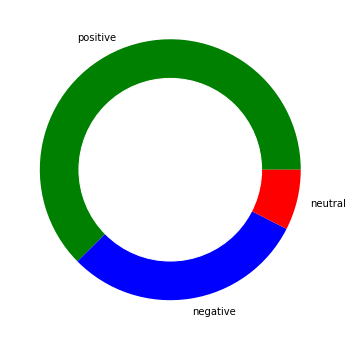

In [46]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

size = df1_sentiment['Total']

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=df1_sentiment.index, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

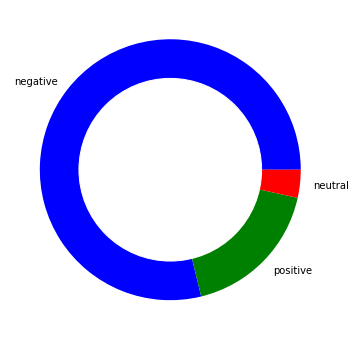

In [47]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

size = df2_sentiment['Total']

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=df2_sentiment.index, colors=['blue','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# 4. Word cloud

In [707]:
def Wordcloud(text):
    data = text
    plt.figure(figsize = (15,15))
    wc = WordCloud(max_words = 50 , width = 1600 , height = 800, collocations=False).generate(" ".join(data))
    plt.imshow(wc)
    

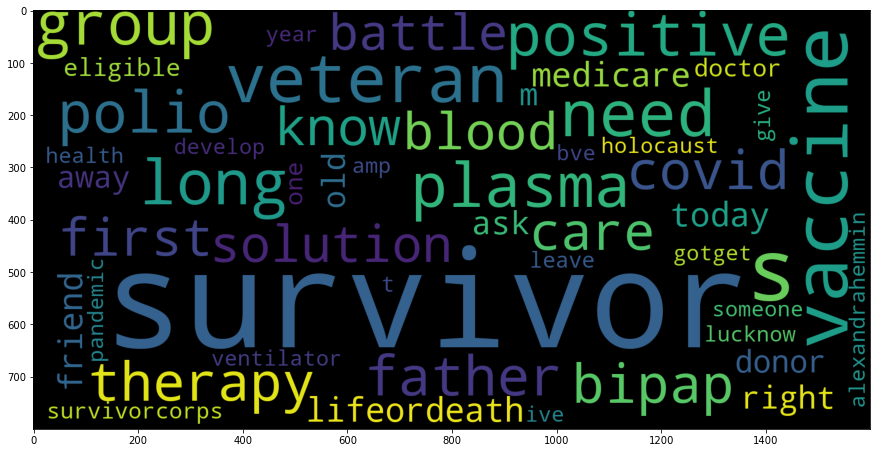

In [711]:
# Wordcloud of positive sentiment in df1
Wordcloud(df1_pos['tweet_text'].values)

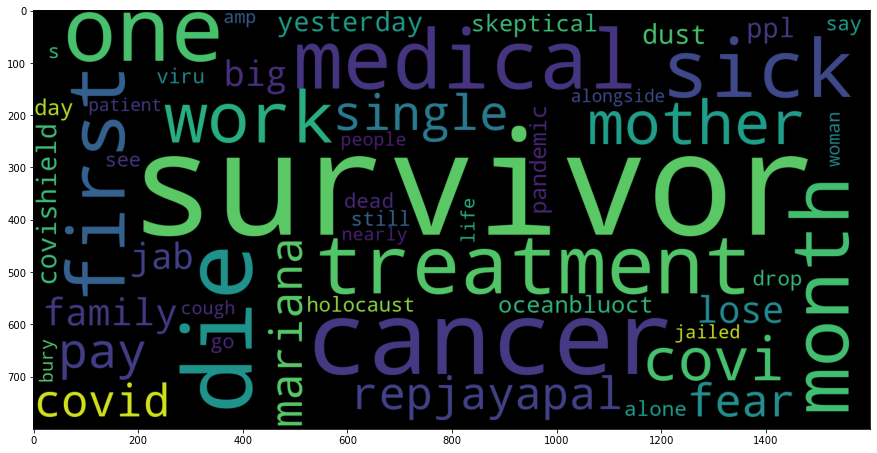

In [530]:
# Wordcloud of negative sentiment in df1
Wordcloud(df1_neg['tweet_text'].values)

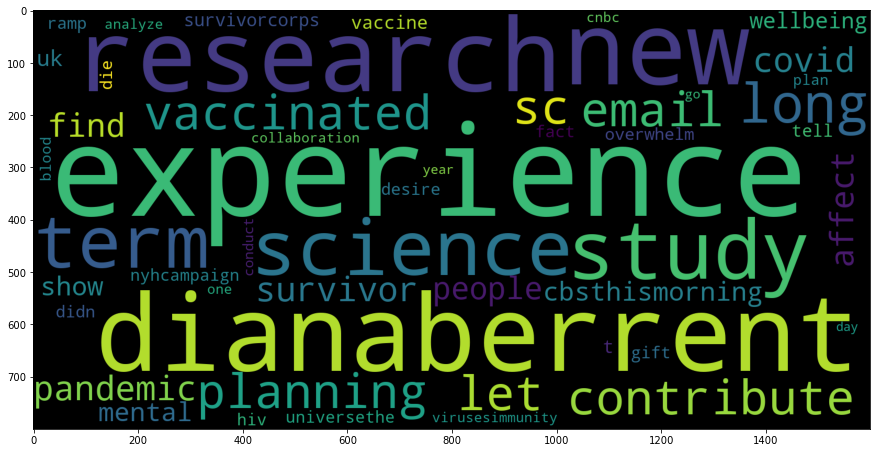

In [531]:
# Wordcloud of neutral sentiment in df1
Wordcloud(df1_neu['tweet_text'].values)

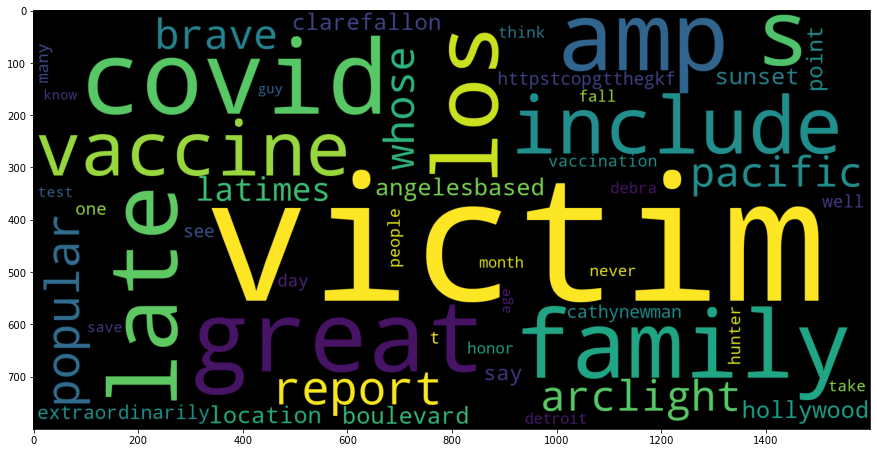

In [532]:
# Wordcloud of positive sentiment in df2
Wordcloud(df2_pos['tweet_text'].values)

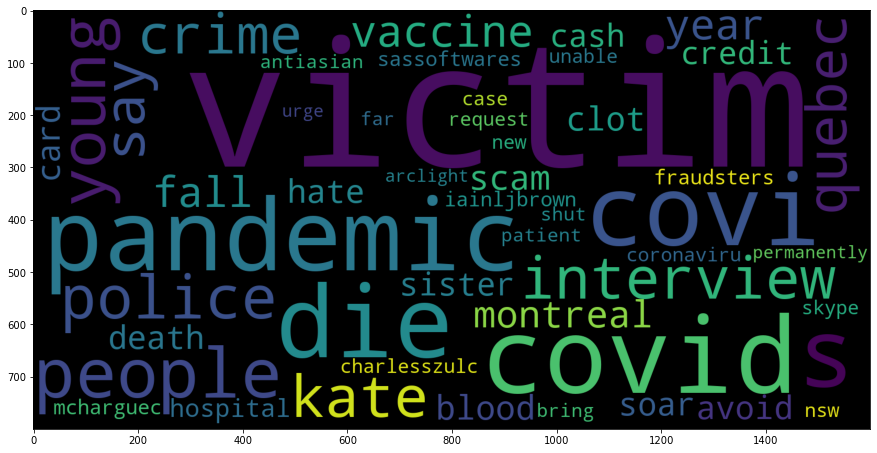

In [533]:
# Wordcloud of negative sentiment in df2
Wordcloud(df2_neg['tweet_text'].values)

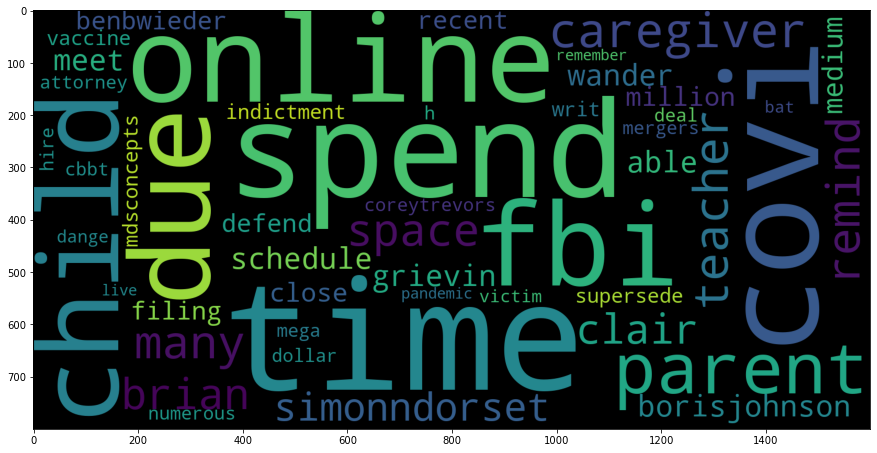

In [534]:
# Wordcloud of neutral sentiment in df2
Wordcloud(df2_neu['tweet_text'].values)

# 5. Temporal nature of mentions

In [48]:
from pandas import to_datetime
from datetime import datetime

## 5.1 Change the format of the time to day-month-year

In [49]:
df1['tweet_create_time'] = pd.to_datetime(df1['tweet_create_time'])
df1['tweet_create_time'] = df1['tweet_create_time'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y"))

df2['tweet_create_time'] = pd.to_datetime(df2['tweet_create_time'])
df2['tweet_create_time'] = df2['tweet_create_time'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y"))

In [50]:
df1_pos['tweet_create_time'] = pd.to_datetime(df1_pos['tweet_create_time'])
df1_pos['tweet_create_time'] = df1_pos['tweet_create_time'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y"))

df1_neg['tweet_create_time'] = pd.to_datetime(df1_neg['tweet_create_time'])
df1_neg['tweet_create_time'] = df1_neg['tweet_create_time'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y"))

df1_neu['tweet_create_time'] = pd.to_datetime(df1_neu['tweet_create_time'])
df1_neu['tweet_create_time'] = df1_neu['tweet_create_time'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y"))

In [51]:
# Drop null columns
df2_neu_new = df2_neu
df2_neu_new.drop(df2_neu[df2_neu['tweet_create_time'].isnull()].index, inplace=True)

In [52]:
df2_pos['tweet_create_time'] = pd.to_datetime(df2_pos['tweet_create_time'])
df2_pos['tweet_create_time'] = df2_pos['tweet_create_time'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y"))

df2_neg['tweet_create_time'] = pd.to_datetime(df2_neg['tweet_create_time'])
df2_neg['tweet_create_time'] = df2_neg['tweet_create_time'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y"))

df2_neu_new['tweet_create_time'] = pd.to_datetime(df2_neu_new['tweet_create_time'])
df2_neu_new['tweet_create_time'] = df2_neu_new['tweet_create_time'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y"))

## 5.2 Group by time 

In [53]:
pos1 = df1_pos.groupby(['tweet_create_time'],as_index=False).count()
pos2 = df2_pos.groupby(['tweet_create_time'],as_index=False).count()

neg1 = df1_neg.groupby(['tweet_create_time'],as_index=False).count()
neg2 = df2_neg.groupby(['tweet_create_time'],as_index=False).count()

neu1 = df1_neu.groupby(['tweet_create_time'],as_index=False).count()
neu2 = df2_neu_new.groupby(['tweet_create_time'],as_index=False).count()

pos1 = pos1[['tweet_create_time','tweet_id']]
pos2 = pos2[['tweet_create_time','tweet_id']]

neg1 = neg1[['tweet_create_time','tweet_id']]
neg2 = neg2[['tweet_create_time','tweet_id']]

neu1 = neu1[['tweet_create_time','tweet_id']]
neu2 = neu2[['tweet_create_time','tweet_id']]


In [54]:
num_df1 = df1.groupby(['tweet_create_time'],as_index=False).count()
num_df1 = num_df1[['tweet_create_time','tweet_id']]

num_df2 = df2.groupby(['tweet_create_time'],as_index=False).count()
num_df2 = num_df2[['tweet_create_time','tweet_id']]

## 5.3 The number of tweet with different sentiments on different days

In [55]:
# df1, blue=positive, red=negative, green=neutral
import plotly.graph_objs as go
fig = go.Figure()
for col in pos1.columns:
    fig.add_trace(go.Scatter(x=pos1['tweet_create_time'], y=pos1['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='blue'
                             )
                 )
for col in neg1.columns:
    fig.add_trace(go.Scatter(x=neg1['tweet_create_time'], y=neg1['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='red'
                             )
                 )
for col in neu1.columns:
    fig.add_trace(go.Scatter(x=neu1['tweet_create_time'], y=neu1['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='green'
                             )
                 )

fig.show()

In [56]:
# df2, blue=positive, red=negative, green=neutral
fig = go.Figure()
for col in pos2.columns:
    fig.add_trace(go.Scatter(x=pos2['tweet_create_time'], y=pos2['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='blue'
                             )
                 )
for col in neg2.columns:
    fig.add_trace(go.Scatter(x=neg2['tweet_create_time'], y=neg2['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='red'
                             )
                 )
for col in neu2.columns:
    fig.add_trace(go.Scatter(x=neu2['tweet_create_time'], y=neu2['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='green'
                             )
                 )

fig.show()

## 5.4 Change the format of the time to day-month-year hour

In [57]:
df1_pos['hour'] = df1_pos['tweet_created_at'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y %H"))
df2_neg['hour'] = df2_neg['tweet_created_at'].apply(lambda x: datetime.strftime(x,"%d-%m-%Y %H"))

## 5.5 Retain data for a specific period of time

In [58]:
# Extract data from 07-09, group by hour
newdf1 = df1_pos[(df1_pos['tweet_create_time']>='07-04-2021') & (df1_pos['tweet_create_time']<='09-04-2021')]
newdf2 = df2_neg[(df2_neg['tweet_create_time']>='07-04-2021') & (df2_neg['tweet_create_time']<='09-04-2021')]

newdf_df1 = newdf1.groupby(['hour'],as_index=False).count()
newdf_df1 = newdf_df1[['hour','tweet_id']]

newdf_df2 = newdf2.groupby(['hour'],as_index=False).count()
newdf_df2 = newdf_df2[['hour','tweet_id']]

# Extract data from 11-12, group by hour
new1df1 = df1_pos[(df1_pos['tweet_create_time']>='11-04-2021') & (df1_pos['tweet_create_time']<='12-04-2021')]
new1df2 = df2_neg[(df2_neg['tweet_create_time']>='11-04-2021') & (df2_neg['tweet_create_time']<='12-04-2021')]

new1df_df1 = new1df1.groupby(['hour'],as_index=False).count()
new1df_df1 = new1df_df1[['hour','tweet_id']]

new1df_df2 = new1df2.groupby(['hour'],as_index=False).count()
new1df_df2 = new1df_df2[['hour','tweet_id']]

In [59]:
# Extract data from 07-12, group by hour
c = df1_pos[(df1_pos['tweet_create_time']>='07-04-2021') & (df1_pos['tweet_create_time']<='12-04-2021')]
d = df2_neg[(df2_neg['tweet_create_time']>='07-04-2021') & (df2_neg['tweet_create_time']<='12-04-2021')]

c1 = c.groupby(['hour'],as_index=False).count()
c1 = c1[['hour','tweet_id']]

d1 = d.groupby(['hour'],as_index=False).count()
d1 = d1[['hour','tweet_id']]


## 5.6 The number of tweet with different sentiments from 2021-04-07 to 2021-04-12

In [60]:
fig = go.Figure()
for col in c1.columns:
    fig.add_trace(go.Scatter(x=c1['hour'], y=c1['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='blue'
                             )
                 )
for col in d1.columns:
    fig.add_trace(go.Scatter(x=d1['hour'], y=d1['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='red'
                             )
                 )

fig.show()

## 5.7 The number of tweet with different sentiments from 2021-04-07 to 2021-04-09

In [61]:
fig = go.Figure()
for col in newdf_df1.columns:
    fig.add_trace(go.Scatter(x=newdf_df1['hour'], y=newdf_df1['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='blue'
                             )
                 )
for col in newdf_df2.columns:
    fig.add_trace(go.Scatter(x=newdf_df2['hour'], y=newdf_df2['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='red'
                             )
                 )

fig.show()

## 5.8 The number of tweet with different sentiments from 2021-04-11 to 2021-04-12

In [62]:
fig = go.Figure()
for col in new1df_df1.columns:
    fig.add_trace(go.Scatter(x=new1df_df1['hour'], y=new1df_df1['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='blue'
                             )
                 )
for col in new1df_df2.columns:
    fig.add_trace(go.Scatter(x=new1df_df2['hour'], y=new1df_df2['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='red'
                             )
                 )

fig.show()

## 5.9 The number of tweet by time

In [63]:
import plotly.graph_objs as go

fig = go.Figure()
for col in num_df1.columns:
    fig.add_trace(go.Scatter(x=num_df1['tweet_create_time'], y=num_df1['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='blue'
                             )
                 )
for col in num_df2.columns:
    fig.add_trace(go.Scatter(x=num_df2['tweet_create_time'], y=num_df2['tweet_id'],
                             name = col,
                             mode = 'markers+lines',
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

## 5.10 The mean of polarity by time

In [551]:
polarity_mean_df1 = df1.groupby('tweet_create_time').agg({'polarity':lambda x:x.mean()})
polarity_mean_df2 = df2.groupby('tweet_create_time').agg({'polarity':lambda x:x.mean()})


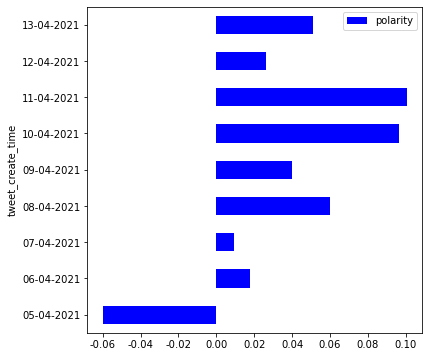

In [552]:
mean_df1 = polarity_mean_df1.plot(kind='barh', color='blue')

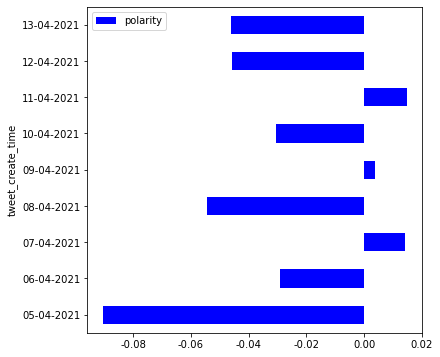

In [553]:
mean_df2 = polarity_mean_df2.plot(kind='barh', color='blue')

## 5.11 The sum of polarity by time

In [554]:
polarity_sum_df1 = df1.groupby('tweet_create_time').agg({'polarity':lambda x:x.sum()})
polarity_sum_df2 = df2.groupby('tweet_create_time').agg({'polarity':lambda x:x.sum()})


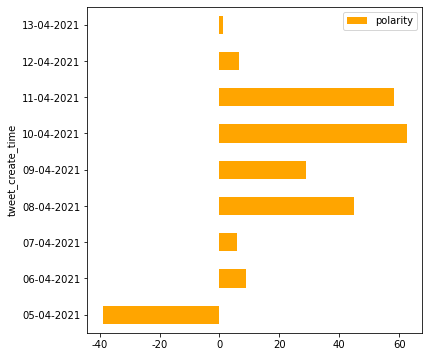

In [555]:
sum_df1 = polarity_sum_df1.plot(kind='barh', color='orange')

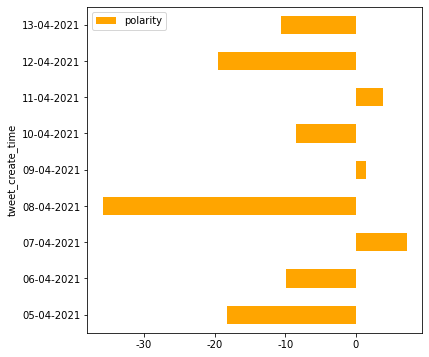

In [556]:
sum_df2 = polarity_sum_df2.plot(kind='barh', color='orange')

# 6. In-depth analysis of text

## 6.1 Getting tokenization of tweet text

In [64]:
# extract alphabetical words of at least 3 characters
tokens_df1 = [nltk.RegexpTokenizer(r'[a-zA-Z]{3,}').tokenize(text) for text in df1['tweet_text']]
tokens_df2 = [nltk.RegexpTokenizer(r'[a-zA-Z]{3,}').tokenize(text) for text in df2['tweet_text']]


## 6.2 Get cleaned word list

In [65]:
# store the stemmer function
import string
stemmer = PorterStemmer()


In [66]:
import string

filtered_tokens_df1 = []

for list in tokens_df1:
    tokens_list = []
    for t in list:
        if t not in remove_words and t not in string.punctuation: # Removing stop words, punctuations
            t = stemmer.stem(t) # Stemming
            tokens_list.append(t) 
    filtered_tokens_df1.append(tokens_list)


In [67]:
filtered_tokens_df2 = []

for list in tokens_df2:
    tokens_list = []
    for t in list:
        if t not in remove_words and t not in string.punctuation: # Removing stop words, punctuations
            t = stemmer.stem(t) # Stemming
            tokens_list.append(t) 
    filtered_tokens_df2.append(tokens_list)


In [68]:
print("FILTERED SET OF TOKENS:", filtered_tokens_df1)

FILTERED SET OF TOKENS: [['rnsaai', 'saffrondalit', 'pleas', 'messag', 'best', 'covid', 'survivor', 'use', 'prevent', 'second', 'attack'], ['tomthunkitsmind', 'yearold', 'mayra', 'ramirez', 'becom', 'first', 'american', 'survivor', 'receiv', 'doublelung', 'transplant'], ['fox', 'cancer', 'survivor', 'stori', 'crazi', 'sob', 'stori'], ['yearold', 'mayra', 'ramirez', 'becom', 'first', 'american', 'survivor', 'receiv', 'doublelung', 'transplant', 'dire', 'messag', 'everyon', 'read', 'irrevers', 'mani', 'effect', 'covi', 'perman', 'vippusadotorgpost', 'httpstcotryshcsq', 'covi'], ['survivor', 'stori', 'suffer', 'covid', 'friend', 'call', 'cant', 'move', 'bodyach', 'make', 'feel', 'paralyz', 'sorri', 'anyth', 'make', 'feel', 'well', 'pray', 'btw', 'sale', 'khaddi', 'gon', 'get', 'credit', 'card', 'covi', 'stayhom'], ['mattreidjgpr', 'alway', 'cool', 'client', 'get', 'exposur', 'posit', 'stori', 'extra', 'fun', 'see', 'ebridgewatergov', 'jame', 'ing'], ['jepetodick', 'blitzburghsti', 'bad', 

In [69]:
print("FILTERED SET OF TOKENS:", filtered_tokens_df2)

FILTERED SET OF TOKENS: [['latim', 'lo', 'angelesbas', 'pacif', 'whose', 'locat', 'includ', 'popular', 'arclight', 'hollywood', 'sunset', 'boulevard', 'late', 'victim'], ['varieti', 'arclight', 'cinema', 'pacif', 'theatr', 'perman', 'shut', 'victim', 'coronaviru', 'pandem', 'bring', 'moviego'], ['varieti', 'arclight', 'cinema', 'pacif', 'theatr', 'perman', 'shut', 'victim', 'coronaviru', 'pandem', 'bring', 'moviego'], ['tomallard', 'east', 'timor', 'independ', 'hero', 'xanana', 'gusmao', 'sad', 'bizarr', 'demis', 'continu', 'slap', 'mourner', 'tri', 'retriev'], ['varieti', 'arclight', 'cinema', 'pacif', 'theatr', 'perman', 'shut', 'victim', 'coronaviru', 'pandem', 'bring', 'moviego'], ['tomallard', 'east', 'timor', 'independ', 'hero', 'xanana', 'gusmao', 'sad', 'bizarr', 'demis', 'continu', 'slap', 'mourner', 'tri', 'retriev'], ['varieti', 'arclight', 'cinema', 'pacif', 'theatr', 'perman', 'shut', 'victim', 'coronaviru', 'pandem', 'bring', 'moviego'], ['rawilcox', 'victim', 'racism', '

In [70]:
# Create the word list
word_df1 = []
for i in filtered_tokens_df1:
    for j in i:
        word_df1.append(j)


In [71]:
word_df2 = []
for i in filtered_tokens_df2:
    for j in i:
        word_df2.append(j)
        

## 6.3 Most frequent word in the word list

In [565]:
from collections import Counter
count_df1 = Counter(word_df1)
top10_word_df1 = count_df1.most_common(10)
top10_word_df1 = pd.DataFrame(top10_word_df1, columns=['words', 'scores'])
top10_word_df1

words  scores
0  survivor    3209
1    vaccin     795
2       get     733
3     covid     506
4       one     448
5     first     434
6    cancer     419
7      long     411
8      need     384
9       die     374

In [566]:
count_df2 = Counter(word_df2)
top10_word_df2 = count_df2.most_common(10)
top10_word_df2 = pd.DataFrame(top10_word_df2, columns=['words', 'scores'])
top10_word_df2

words  scores
0  victim    2632
1   covid     539
2    covi     443
3  pandem     434
4     die     413
5   peopl     378
6  vaccin     365
7     get     334
8   young     298
9     say     292

<AxesSubplot:xlabel='words', ylabel='scores'>

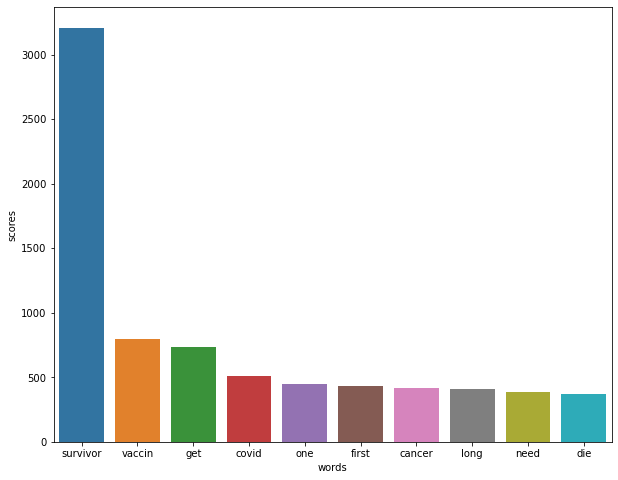

In [567]:
plt.figure(figsize = (10,8))
sns.barplot(x='words',y='scores',data=top10_word_df1)

<AxesSubplot:xlabel='words', ylabel='scores'>

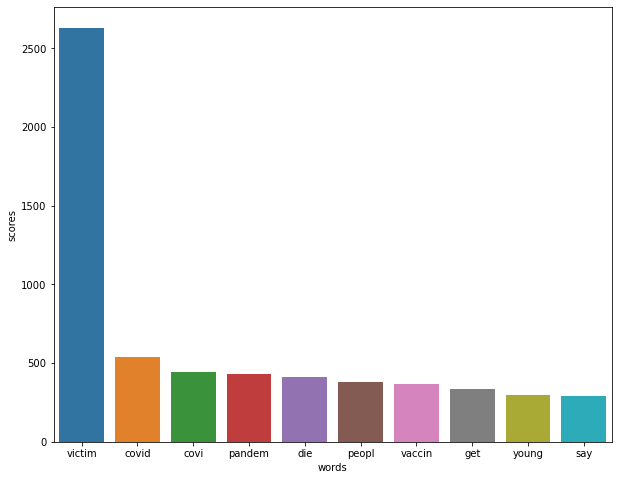

In [568]:
plt.figure(figsize = (10,8))
sns.barplot(x='words',y='scores',data=top10_word_df2)

## 6.4 Bag of Words

In [72]:
def get_top_n_gram(corpus,ngram_range,n=None):
    """
    CountVectorizer()函数只考虑每个单词出现的频率；然后构成一个特征矩阵，每一行表示一个训练文本的各个词的词频统计结果
    
    return 前n个词频最高的词语词组
    """
    vec = CountVectorizer(ngram_range=ngram_range,stop_words ='english').fit(corpus) 
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) # sum_words是matrix，sum_words[0, idx]=第0行，第idx列
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] # vec.vocabulary_.items()：{‘dog’:2,'cat':1,'fish':3,'bird':0} 字典形式呈现，key：词，value:词频
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) # 按照sum_words[0, idx]来排序
    return words_freq[:n]


### 6.4.1 Two words of df1

In [570]:
get_top_n_gram(df1_pos['tweet_text'],(2,2),20)

[('need plasma', 250),
 ('plasma therapy', 238),
 ('father positive', 238),
 ('positive bipap', 238),
 ('survivor lifeordeath', 187),
 ('lifeordeath battle', 187),
 ('solution survivor', 185),
 ('battle medicare', 179),
 ('blood group', 144),
 ('polio survivor', 143),
 ('eligible donor', 133),
 ('survivor leave', 131),
 ('alexandrahemmin gotget', 129),
 ('gotget vaccine', 129),
 ('vaccine polio', 129),
 ('polio develop', 129),
 ('develop right', 129),
 ('right old', 129),
 ('old polio', 129),
 ('group bve', 128)]

In [571]:
get_top_n_gram(df1_neg['tweet_text'],(2,2),20)

[('cancer survivor', 305),
 ('sick work', 196),
 ('mariana single', 194),
 ('single mother', 194),
 ('mother sick', 194),
 ('work pay', 194),
 ('pay month', 194),
 ('month medical', 194),
 ('medical treatment', 194),
 ('repjayapal mariana', 192),
 ('big fear', 148),
 ('dust jab', 134),
 ('jab covishield', 134),
 ('covishield yesterday', 134),
 ('yesterday ppl', 134),
 ('ppl skeptical', 134),
 ('skeptical cancer', 134),
 ('oceanbluoct dust', 132),
 ('survivor covi', 132),
 ('drop dead', 96)]

In [572]:
get_top_n_gram(df1_neu['tweet_text'],(2,2),20)

[('dianaberrent experience', 83),
 ('experience long', 83),
 ('long term', 83),
 ('term planning', 83),
 ('planning vaccinated', 83),
 ('vaccinated let', 83),
 ('let experience', 83),
 ('experience contribute', 83),
 ('contribute science', 83),
 ('science email', 83),
 ('email sc', 83),
 ('new research', 68),
 ('cbsthismorning new', 66),
 ('research pandemic', 66),
 ('pandemic affect', 66),
 ('affect people', 66),
 ('people mental', 66),
 ('mental wellbeing', 66),
 ('wellbeing uk', 66),
 ('uk study', 66)]

### 6.4.2 Three words of df1

In [573]:
get_top_n_gram(df1_pos['tweet_text'],(3,3),20)

[('need plasma therapy', 238),
 ('father positive bipap', 238),
 ('survivor lifeordeath battle', 187),
 ('solution survivor lifeordeath', 185),
 ('lifeordeath battle medicare', 179),
 ('alexandrahemmin gotget vaccine', 129),
 ('gotget vaccine polio', 129),
 ('vaccine polio develop', 129),
 ('polio develop right', 129),
 ('develop right old', 129),
 ('right old polio', 129),
 ('old polio survivor', 129),
 ('polio survivor leave', 129),
 ('blood group bve', 128),
 ('positive bipap ventilator', 126),
 ('bipap ventilator lucknow', 126),
 ('ventilator lucknow blood', 126),
 ('lucknow blood group', 126),
 ('rahulsinghkasan need plasma', 124),
 ('plasma therapy friends', 124)]

In [574]:
get_top_n_gram(df1_neg['tweet_text'],(3,3),20)

[('mariana single mother', 194),
 ('single mother sick', 194),
 ('mother sick work', 194),
 ('sick work pay', 194),
 ('work pay month', 194),
 ('pay month medical', 194),
 ('month medical treatment', 194),
 ('repjayapal mariana single', 192),
 ('dust jab covishield', 134),
 ('jab covishield yesterday', 134),
 ('covishield yesterday ppl', 134),
 ('yesterday ppl skeptical', 134),
 ('ppl skeptical cancer', 134),
 ('skeptical cancer survivor', 134),
 ('oceanbluoct dust jab', 132),
 ('cancer survivor covi', 132),
 ('big fear die', 74),
 ('fear die big', 74),
 ('die big fear', 74),
 ('big fear family', 74)]

In [575]:
get_top_n_gram(df1_neu['tweet_text'],(3,3),20)

[('dianaberrent experience long', 83),
 ('experience long term', 83),
 ('long term planning', 83),
 ('term planning vaccinated', 83),
 ('planning vaccinated let', 83),
 ('vaccinated let experience', 83),
 ('let experience contribute', 83),
 ('experience contribute science', 83),
 ('contribute science email', 83),
 ('science email sc', 83),
 ('cbsthismorning new research', 66),
 ('new research pandemic', 66),
 ('research pandemic affect', 66),
 ('pandemic affect people', 66),
 ('affect people mental', 66),
 ('people mental wellbeing', 66),
 ('mental wellbeing uk', 66),
 ('wellbeing uk study', 66),
 ('uk study covid', 66),
 ('study covid survivors', 66)]

### 6.4.3 Two words of df2

In [576]:
get_top_n_gram(df2_pos['tweet_text'],(2,2),20)

[('late victim', 54),
 ('latimes los', 46),
 ('los angelesbased', 46),
 ('angelesbased pacific', 46),
 ('pacific location', 46),
 ('location include', 46),
 ('include popular', 46),
 ('popular arclight', 46),
 ('arclight hollywood', 46),
 ('hollywood sunset', 46),
 ('sunset boulevard', 46),
 ('boulevard late', 46),
 ('extraordinarily brave', 39),
 ('brave family', 39),
 ('family great', 39),
 ('great report', 39),
 ('report clarefallon', 39),
 ('clarefallon httpstcopgtthegkf', 39),
 ('cathynewman extraordinarily', 38),
 ('debra hunter', 29)]

In [577]:
get_top_n_gram(df2_neg['tweet_text'],(2,2),20)

[('young victim', 234),
 ('victim pandemic', 220),
 ('fall victim', 214),
 ('pandemic quebec', 207),
 ('blood clot', 172),
 ('clot victim', 160),
 ('avoid fall', 157),
 ('iainljbrown credit', 153),
 ('credit card', 153),
 ('card scam', 153),
 ('scam soar', 153),
 ('soar fraudsters', 153),
 ('fraudsters cash', 153),
 ('cash covid', 153),
 ('covid avoid', 153),
 ('victim sassoftwares', 153),
 ('sassoftwares mcharguec', 153),
 ('victim sister', 148),
 ('die covi', 137),
 ('nsw police', 130)]

In [578]:
get_top_n_gram(df2_neu['tweet_text'],(2,2),20)

[('child spend', 17),
 ('spend time', 17),
 ('time online', 17),
 ('online covi', 17),
 ('covi fbi', 17),
 ('parent caregiver', 17),
 ('caregiver teacher', 17),
 ('fbi remind', 16),
 ('remind parent', 16),
 ('clair simonndorset', 13),
 ('simonndorset borisjohnson', 13),
 ('borisjohnson wander', 13),
 ('wander space', 13),
 ('space schedule', 13),
 ('schedule able', 13),
 ('able meet', 13),
 ('meet grievin', 13),
 ('benbwieder defend', 9),
 ('defend time', 9),
 ('time filing', 9)]

### 6.4.4 Three words of df2

In [579]:
get_top_n_gram(df2_pos['tweet_text'],(3,3),20)

[('latimes los angelesbased', 46),
 ('los angelesbased pacific', 46),
 ('angelesbased pacific location', 46),
 ('pacific location include', 46),
 ('location include popular', 46),
 ('include popular arclight', 46),
 ('popular arclight hollywood', 46),
 ('arclight hollywood sunset', 46),
 ('hollywood sunset boulevard', 46),
 ('sunset boulevard late', 46),
 ('boulevard late victim', 46),
 ('extraordinarily brave family', 39),
 ('brave family great', 39),
 ('family great report', 39),
 ('great report clarefallon', 39),
 ('report clarefallon httpstcopgtthegkf', 39),
 ('cathynewman extraordinarily brave', 38),
 ('memorial honor detroit', 20),
 ('honor detroit victim', 20),
 ('detroit victim age', 20)]

In [580]:
get_top_n_gram(df2_neg['tweet_text'],(3,3),20)

[('young victim pandemic', 209),
 ('victim pandemic quebec', 207),
 ('blood clot victim', 160),
 ('avoid fall victim', 157),
 ('iainljbrown credit card', 153),
 ('credit card scam', 153),
 ('card scam soar', 153),
 ('scam soar fraudsters', 153),
 ('soar fraudsters cash', 153),
 ('fraudsters cash covid', 153),
 ('cash covid avoid', 153),
 ('covid avoid fall', 153),
 ('fall victim sassoftwares', 153),
 ('victim sassoftwares mcharguec', 153),
 ('clot victim sister', 147),
 ('charlesszulc victim kate', 128),
 ('victim kate request', 128),
 ('kate request skype', 128),
 ('request skype interview', 128),
 ('skype interview police', 128)]

In [581]:
get_top_n_gram(df2_neu['tweet_text'],(3,3),20)

[('child spend time', 17),
 ('spend time online', 17),
 ('time online covi', 17),
 ('online covi fbi', 17),
 ('parent caregiver teacher', 17),
 ('covi fbi remind', 16),
 ('fbi remind parent', 16),
 ('remind parent caregiver', 16),
 ('clair simonndorset borisjohnson', 13),
 ('simonndorset borisjohnson wander', 13),
 ('borisjohnson wander space', 13),
 ('wander space schedule', 13),
 ('space schedule able', 13),
 ('schedule able meet', 13),
 ('able meet grievin', 13),
 ('benbwieder defend time', 9),
 ('defend time filing', 9),
 ('time filing recent', 9),
 ('filing recent supersede', 9),
 ('recent supersede indictment', 9)]

## 6.5 LDA

In [79]:
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.corpora import Dictionary


In [80]:
# df1
vocabs = corpora.Dictionary(filtered_tokens_df1) # generate vocabulary dictionary
corpus = [vocabs.doc2bow(review_doc) for review_doc in filtered_tokens_df1] # generate % for training model, e.g [(0, 1), (1, 1)...]

# df2
vocabs1 = corpora.Dictionary(filtered_tokens_df2) # generate vocabulary dictionary
corpus1 = [vocabs.doc2bow(review_doc) for review_doc in filtered_tokens_df2] # generate corpus for training model, e.g [(0, 1), (1, 1)...]


### 6.5.1 Perplexity & Coherence

In [584]:
def lda_model_values(num_topics, corpus, dictionary, texts):
    x = [] # x轴
    perplexity_values = [] # 困惑度
    coherence_values = []   # 一致性
    model_list = [] # 存储对应主题数量下的lda模型,便于生成可视化网页

    for topic in range(num_topics):
        print("主题数量：", topic+1)
        lda_model = models.LdaModel(corpus=corpus, num_topics=topic+1, id2word =vocabs, chunksize = 2000, passes=20, iterations = 400)
        model_list.append(lda_model)
        x.append(topic+1)
        perplexity_values.append(lda_model.log_perplexity(corpus))

        coherencemodel = models.CoherenceModel(model=lda_model, texts=texts, dictionary=vocabs, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print("该主题评价完成\n")
    return model_list, x, perplexity_values, coherence_values
    


In [81]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import xticks,yticks,np

num_topics = 10

In [586]:
# df1
# 调用准备函数
model_list, x, perplexity_values, coherence_values = lda_model_values(num_topics, corpus, vocabs, filtered_tokens_df1) 


主题数量： 1
该主题评价完成

主题数量： 2
该主题评价完成

主题数量： 3
该主题评价完成

主题数量： 4
该主题评价完成

主题数量： 5
该主题评价完成

主题数量： 6
该主题评价完成

主题数量： 7
该主题评价完成

主题数量： 8
该主题评价完成

主题数量： 9
该主题评价完成

主题数量： 10
该主题评价完成



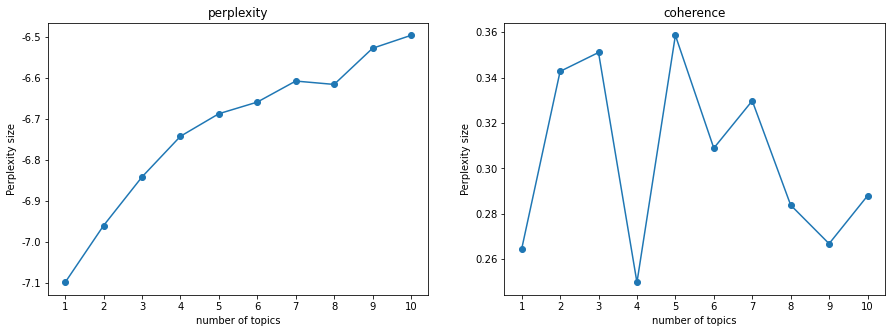

In [587]:
# 绘制困惑度和一致性折线图
fig = plt.figure(figsize=(15,5))
matplotlib.rcParams['axes.unicode_minus'] = False 


ax1 = fig.add_subplot(1, 2, 1)
plt.plot(x, perplexity_values, marker="o")
plt.title('perplexity')
plt.xlabel('number of topics')
plt.ylabel('Perplexity size')
xticks(np.linspace(1, num_topics, num_topics, endpoint=True)) # 保证x轴刻度为1



ax2 = fig.add_subplot(1, 2, 2)
plt.plot(x, coherence_values, marker="o")
plt.title("coherence")
plt.xlabel("number of topics")
plt.ylabel("Perplexity size")
xticks(np.linspace(1, num_topics, num_topics, endpoint=True))

plt.show()

In [588]:
# best select: number of topics = 5

In [722]:
# df2
# 调用准备函数
model_list, x, perplexity_values, coherence_values = lda_model_values(num_topics, corpus1, vocabs1, filtered_tokens_df2)


主题数量： 1
该主题评价完成

主题数量： 2
该主题评价完成

主题数量： 3
该主题评价完成

主题数量： 4
该主题评价完成

主题数量： 5
该主题评价完成

主题数量： 6
该主题评价完成

主题数量： 7
该主题评价完成

主题数量： 8
该主题评价完成

主题数量： 9
该主题评价完成

主题数量： 10
该主题评价完成



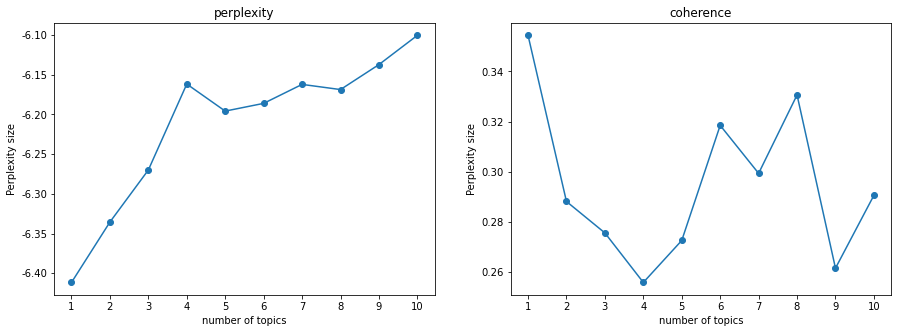

In [723]:
# 绘制困惑度和一致性折线图
fig = plt.figure(figsize=(15,5))
matplotlib.rcParams['axes.unicode_minus'] = False 


ax1 = fig.add_subplot(1, 2, 1)
plt.plot(x, perplexity_values, marker="o")
plt.title('perplexity')
plt.xlabel('number of topics')
plt.ylabel('Perplexity size')
xticks(np.linspace(1, num_topics, num_topics, endpoint=True)) # 保证x轴刻度为1



ax2 = fig.add_subplot(1, 2, 2)
plt.plot(x, coherence_values, marker="o")
plt.title("coherence")
plt.xlabel("number of topics")
plt.ylabel("Perplexity size")
xticks(np.linspace(1, num_topics, num_topics, endpoint=True))

plt.show()

In [724]:
# best select: number of topics = 8

### 6.5.2 Setup model

In [592]:
# df1
lda_df1 = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=5)

In [593]:
pyLDAvis.enable_notebook()

vis_data_df1 = pyLDAvis.gensim_models.prepare(lda_df1, corpus, vocabs)

In [594]:
vis_data_df1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.064728  0.000221       1        1  24.501656
0      0.154490  0.116028       2        1  24.482581
2      0.039186 -0.221775       3        1  19.241535
3     -0.213816  0.026850       4        1  18.918767
1     -0.044588  0.078676       5        1  12.855460, topic_info=          Term        Freq       Total Category  logprob  loglift
1237   mariana  490.000000  490.000000  Default  30.0000  30.0000
1240     solut  390.000000  390.000000  Default  29.0000  29.0000
14       first  488.000000  488.000000  Default  28.0000  28.0000
1505  repjayap  352.000000  352.000000  Default  27.0000  27.0000
337     experi  506.000000  506.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
324        die   30.862324  239.949079   Topic5  -5.5462   0.0005
212        say   28.868733  183.580681   Topic5  -5.6130   0.2015
140        one   32.006884  609.108770   Topic5  -5.5098  -0.8946
26        covi   29.965451  392.679497   Topic5  -5.5757  -0.5215
4        pleas   26.159788  103.128248   Topic5  -5.7115   0.6797

[326 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2576      1  0.043267     abroad
2576      2  0.043267     abroad
2576      5  0.908608     abroad
1933      1  0.984834    account
1376      1  0.018033     affect
...     ...       ...        ...
20        4  0.563301    yearold
20        5  0.135192    yearold
3111      1  0.015653  yesterday
3111      3  0.003913  yesterday
3111      4  0.982249  yesterday

[736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2])

In [91]:
# df2
lda_df2 = models.ldamodel.LdaModel(corpus=corpus1, id2word=vocabs1, num_topics=6)

In [92]:
pyLDAvis.enable_notebook()

vis_data_df2 = pyLDAvis.gensim_models.prepare(lda_df2, corpus1, vocabs1)

In [93]:
vis_data_df2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.144496  0.095366       1        1  27.237602
1      0.008201  0.037085       2        1  23.677943
5     -0.151937  0.118521       3        1  17.983814
2      0.101382 -0.057174       4        1  13.592203
0     -0.047119 -0.119352       5        1   8.855579
4     -0.055023 -0.074446       6        1   8.652859, topic_info=                 Term        Freq       Total Category  logprob  loglift
1000           mechan  349.000000  349.000000  Default  30.0000  30.0000
595           problem  313.000000  313.000000  Default  29.0000  29.0000
3554  httpstcowxgvhxv  283.000000  283.000000  Default  28.0000  28.0000
1319  httpstcounaltyb  316.000000  316.000000  Default  27.0000  27.0000
599           stretch  187.000000  187.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
258            sidrag   11.142399   59.385551   Topic6  -5.4381   0.7740
299         yesterday   14.253159  398.516234   Topic6  -5.1919  -0.8835
347             charg   10.362667   44.926337   Topic6  -5.5107   0.9805
1113     jeffreyatuck   10.461579   53.079226   Topic6  -5.5012   0.8232
329       whistleblow   10.251251  104.025144   Topic6  -5.5215   0.1300

[386 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3898      4  0.260249  aartitikoo
3898      6  0.650621  aartitikoo
1186      2  0.903849   aftvmedia
1186      3  0.047571   aftvmedia
404       1  0.090695         air
...     ...       ...         ...
299       5  0.017565   yesterday
299       6  0.035130   yesterday
950       3  0.074454     zypisfi
950       4  0.148908     zypisfi
950       5  0.744540     zypisfi

[923 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 6, 3, 1, 5])

## 6.6 Word2Vec

### 6.6.1 skipgram model

In [598]:
from gensim.models import Word2Vec

# set model parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 5    # Minimum word count                        
context = 5           # Context window size
sg = 1                # skipgram=1, cbow=0
num_workers = 4       # Number of threads to run in parallel

# train the model
model_sg100_df1 = Word2Vec(filtered_tokens_df1, vector_size=num_features, window=context, min_count=min_word_count, sg=sg, workers=num_workers)
model_sg100_df2 = Word2Vec(filtered_tokens_df2, vector_size=num_features, window=context, min_count=min_word_count, sg=sg, workers=num_workers)



In [599]:
# all word embeddings
word_vectors_df1 = model_sg100_df1.wv.vectors
word_vectors_df2 = model_sg100_df2.wv.vectors

# num_words * num_features
print(word_vectors_df1.shape) 
print(word_vectors_df2.shape) 

(1402, 100)
(1284, 100)


In [600]:
print(model_sg100_df1.wv.most_similar("survivor"))
print('-'*135)
print(model_sg100_df1.wv.most_similar("victim"))
print('-'*135)
print(model_sg100_df1.wv.most_similar("covid"))
print('-'*135)
print('-'*135)
print(model_sg100_df2.wv.most_similar("victim"))
print('-'*135)
print(model_sg100_df2.wv.most_similar("survivor"))
print('-'*135)
print(model_sg100_df2.wv.most_similar("covid"))

[('vaccin', 0.5154855251312256), ('granddaught', 0.48579373955726624), ('httpstcoirrftixu', 0.48213908076286316), ('guardianu', 0.48070135712623596), ('opomom', 0.4804005026817322), ('httpstcoltdqxd', 0.47988277673721313), ('semahernandez', 0.47797298431396484), ('steelwork', 0.47647562623023987), ('nbcnightlynew', 0.47542238235473633), ('pittsburgh', 0.47318825125694275)]
---------------------------------------------------------------------------------------------------------------------------------------
[('clearli', 0.9605095386505127), ('afraid', 0.9566794037818909), ('white', 0.9548106789588928), ('fellow', 0.9547263383865356), ('individu', 0.953464686870575), ('compromis', 0.9527022242546082), ('wisconsinit', 0.9526911973953247), ('warden', 0.9516075849533081), ('vangord', 0.9511839747428894), ('steam', 0.9510751962661743)]
---------------------------------------------------------------------------------------------------------------------------------------
[('viewer', 0.86084496

### 6.6.2 cbow model

In [601]:
# set model parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 5    # Minimum word count                        
context = 5           # Context window size
sg = 0                # skipgram=1, cbow=0
num_workers = 4       # Number of threads to run in parallel

# train the model
model_sg100_df1 = Word2Vec(filtered_tokens_df1, vector_size=num_features, window=context, min_count=min_word_count, sg=sg, workers=num_workers)
model_sg100_df2 = Word2Vec(filtered_tokens_df2, vector_size=num_features, window=context, min_count=min_word_count, sg=sg, workers=num_workers)


In [602]:
# all word embeddings
word_vectors_df1 = model_sg100_df1.wv.vectors
word_vectors_df2 = model_sg100_df2.wv.vectors

# num_words * num_features
print(word_vectors_df1.shape) 
print(word_vectors_df2.shape)

(1402, 100)
(1284, 100)


In [603]:
print(model_sg100_df1.wv.most_similar("survivor"))
print('-'*135)
print(model_sg100_df1.wv.most_similar("victim"))
print('-'*135)
print(model_sg100_df1.wv.most_similar("covid"))
print('-'*135)
print('-'*135)
print(model_sg100_df2.wv.most_similar("victim"))
print('-'*135)
print(model_sg100_df2.wv.most_similar("survivor"))
print('-'*135)
print(model_sg100_df2.wv.most_similar("covid"))

[('second', 0.9200022220611572), ('lmao', 0.919495165348053), ('choic', 0.9157894849777222), ('bear', 0.9153540730476379), ('realiz', 0.9148815870285034), ('ajenglish', 0.9145573377609253), ('franci', 0.9139894247055054), ('hashoah', 0.9137734174728394), ('breast', 0.9129608869552612), ('secret', 0.9115449786186218)]
---------------------------------------------------------------------------------------------------------------------------------------
[('domest', 0.9933169484138489), ('littl', 0.9930258989334106), ('violenc', 0.9929137825965881), ('med', 0.9924086332321167), ('full', 0.9923693537712097), ('gon', 0.9921310544013977), ('servic', 0.9919503927230835), ('compar', 0.9919496178627014), ('grad', 0.9918794631958008), ('school', 0.9918414354324341)]
---------------------------------------------------------------------------------------------------------------------------------------
[('less', 0.9246124029159546), ('earli', 0.9157907366752625), ('intub', 0.9127697348594666), ('gui

## 6.7 Networkx

### 6.7.1 Create new dataframe

In [94]:
df1_networkx = df1[['user_id', 'mentions']]
df2_networkx = df2[['user_id', 'mentions']]

### 6.7.2 Remove empty values

In [95]:
index1 = df1_networkx[df1_networkx['mentions'].isnull()].index
index2 = df2_networkx[df2_networkx['mentions'].isnull()].index

In [96]:
df1_networkx.drop(index=index1, inplace=True)
df2_networkx.drop(index=index2, inplace=True)

### 6.7.3 Explode column 'mentions'

In [97]:
df1_networkx['mentions'] = df1_networkx['mentions'].str.split(';') 
df1_networkx = df1_networkx.explode("mentions")

df2_networkx['mentions'] = df2_networkx['mentions'].str.split(';') 
df2_networkx = df2_networkx.explode("mentions")

In [98]:
df1_networkx = df1_networkx.set_index('user_id')
df2_networkx = df2_networkx.set_index('user_id')

### 6.7.4 Store the dataframe as csv file

In [99]:
df1_networkx.to_csv('df1_networkx.csv')
df2_networkx.to_csv('df2_networkx.csv')

### 6.7.5 Setup the model

In [100]:
import networkx as nx
G1 = nx.read_edgelist("df1_networkx.csv", delimiter=',', create_using=nx.DiGraph())
G2 = nx.read_edgelist("df2_networkx.csv", delimiter=',', create_using=nx.DiGraph())

### 6.7.6 In degree

In [101]:
in_degrees = G1.in_degree()
avg_in_degree = 0
for x in in_degrees:
  avg_in_degree += x[1]

avg_in_degree = avg_in_degree / len(in_degrees)
print(avg_in_degree)

0.9382632293080054


In [102]:
name=[]
score=[]
dict={}
for x in in_degrees:
    if x[1] > avg_in_degree:
        name.append(x[0])
        score.append(x[1])

dict['name']=name
dict['score']=score

df=pd.DataFrame([dict])

df_name = df[['name']]
df_score = df[['score']]

df_name = df_name.explode('name')
df_score = df_score.explode('score')

df_sur = pd.concat([df_name,df_score], axis=1)
df_sur.sort_values(by='score', axis=0,ascending=False, inplace=True)

In [103]:
df_sur.head(10)

name score
0       RepJayapal    98
0     dianaberrent    83
0           smc429    82
0     RepMattGaetz    82
0   Survivor_Corps    72
0   oceanblue11oct    67
0  AlexandraHemmin    67
0  RahulSinghkasan    63
0           cew821    58
0  Chatterj1Asking    55

In [104]:
in_degrees = G2.in_degree()
avg_in_degree = 0
for x in in_degrees:
  avg_in_degree += x[1]

avg_in_degree = avg_in_degree / len(in_degrees)
print(avg_in_degree)

0.8924050632911392


In [105]:
name=[]
score=[]
dict={}
for x in in_degrees:
    if x[1] > avg_in_degree:
        name.append(x[0])
        score.append(x[1])

dict['name']=name
dict['score']=score

df=pd.DataFrame([dict])

df_name = df[['name']]
df_score = df[['score']]

df_name = df_name.explode('name')
df_score = df_score.explode('score')

df_vic = pd.concat([df_name,df_score], axis=1)
df_vic.sort_values(by='score', axis=0,ascending=False, inplace=True)

In [106]:
df_vic.head(10)

name score
0    CharlesSzulc   128
0         Variety   114
0       CeFaanKim   106
0          21WIRE    83
0   RatanSharda55    78
0        13thFool    72
0       _Rawilcox    71
0   thedailybeast    54
0   ChuSteJustine    50
0  picardonhealth    50

In [107]:
df1_pos_text = df1_pos['tweet_text']
df1_neg_text = df1_neg['tweet_text']
df1_neu_text = df1_neu['tweet_text']

df2_pos_text = df2_pos['tweet_text']
df2_neg_text = df2_neg['tweet_text']
df2_neu_text = df2_neu['tweet_text']

In [108]:
df1_pos_text.to_csv('df1_pos_text.csv')
df1_neg_text.to_csv('df1_neg_text.csv')
df1_neu_text.to_csv('df1_neu_text.csv')
df2_pos_text.to_csv('df2_pos_text.csv')
df2_neg_text.to_csv('df2_neg_text.csv')
df2_neu_text.to_csv('df2_neu_text.csv')